## Finding best model for coconut copra type using supervised learning algorithm

In [24]:
# Lib untuk manipulasi data
import numpy as np
import pandas as pd

# lib untuk analisa statistik
import scipy.stats as sc
import statsmodels.api as sm

# lib untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# lib untuk praproses dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# lib untuk klasifikasi data
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, NuSVC, LinearSVC

# library untuk evaluasi model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# lib disble warning
import warnings
warnings.filterwarnings('ignore')

- config models

In [25]:
# config models
experiments = 7   # fill number 1 until 7
splitting = 80  # fill number 90 or 80

### 1. Data acquisition

In [26]:
# load dataset
dataset = pd.read_csv("dataset/ekstrasi-fitur-kopra-nonTelungkup_v2.csv")

In [27]:
# show metadata
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mean_R           1839 non-null   float64
 1   Mean_G           1839 non-null   float64
 2   Mean_B           1839 non-null   float64
 3   Mean_H           1839 non-null   float64
 4   Mean_V           1839 non-null   float64
 5   Mean_S           1839 non-null   float64
 6   Mean_Gray        1839 non-null   float64
 7   Standar_Deviasi  1839 non-null   float64
 8   Luas             1839 non-null   float64
 9   Perimeter        1839 non-null   float64
 10  Contrast         1839 non-null   float64
 11  Dissimilarity    1839 non-null   float64
 12  Homogeneity      1839 non-null   float64
 13  Energy           1839 non-null   float64
 14  Correlation      1839 non-null   float64
 15  Jenis_Kopra      1839 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 230.0 KB


In [28]:
# show dataset
np.round(dataset, 4)

,Mean_R,Mean_G,Mean_B,Mean_H,Mean_V,Mean_S,Mean_Gray,Standar_Deviasi,Luas,Perimeter,Contrast,Dissimilarity,Homogeneity,Energy,Correlation,Jenis_Kopra
0,99.7735,85.2993,72.5793,11.2720,99.7906,51.0244,88.1944,54.5893,7933.5,2053.3048,43.4466,3.3410,0.4820,0.2282,0.9927,1
1,114.1627,110.4249,91.1458,19.0044,114.8282,36.8718,109.3581,79.9393,33489.0,1334.8469,68.7073,4.1415,0.4737,0.2763,0.9946,1
2,86.7587,77.0958,58.2202,14.3739,86.7604,58.7899,77.8335,52.0851,1958.5,573.8549,37.7350,2.9174,0.5221,0.2355,0.9930,1
3,80.3976,71.1794,55.9146,12.9194,80.3995,52.5784,72.2365,52.3093,2908.0,862.9747,34.4723,2.6061,0.5649,0.2639,0.9937,1
4,98.9635,89.0470,68.0217,14.3642,98.9674,56.0236,89.6345,63.7584,31867.5,706.1392,51.5219,3.0583,0.5406,0.2576,0.9936,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,65.6997,53.8509,38.5199,13.2483,65.7217,78.2459,55.6460,38.1312,274.5,94.8112,55.9696,3.6349,0.4470,0.2087,0.9806,3
1835,56.1067,52.0908,39.0243,20.3346,57.6599,63.2588,51.8051,35.6666,513.0,153.8234,87.9853,5.1970,0.3650,0.2058,0.9652,3
1836,57.3916,46.5022,29.4403,12.4246,57.3923,83.2977,47.8252,37.2503,150.0,172.8528,76.8202,4.5265,0.4297,0.2698,0.9722,3
1837,66.6046,58.9452,41.0883,14.9776,66.6068,68.8092,59.2135,41.0479,342.0,171.0538,68.5011,4.4026,0.4286,0.2436,0.9796,3


### 3. Data Preprocessing

- set feature and label

In [29]:
# set experiment color
if(experiments == 1):
  exp = "Experiments 1"
  x = dataset.iloc[:,0:8].values # color
  np.array(np.round(x,4))

# set experiment shape
elif(experiments == 2):
  exp = "Experiments 2"
  x = dataset.iloc[:,8:10].values # shape
  np.array(np.round(x,4))

# set experiment texture
elif(experiments == 3):
  exp = "Experiments 3"
  x = dataset.iloc[:,10:15].values # texture
  np.array(np.round(x,4))
  
# set experiment color and shape
elif(experiments == 4):
  exp = "Experiments 4"
  x = dataset.iloc[:,0:10].values # color and shape
  np.array(np.round(x,4))
  
# set experiment color and texture
elif(experiments == 5):
  exp = "Experiments 5"
  x = dataset.iloc[:,[0,1,2,3,4,5,6,7,10,11,12,13,14]].values # shape and texture
  np.array(np.round(x,4))
  
# set experiment shape and texture
elif(experiments == 6):
  exp = "Experiments 6"
  x = dataset.iloc[:,8:15].values # shape and texture
  np.array(np.round(x,4))
  
# set experiment color, shape, texture
else:
  exp = "Experiments 7"
  x = dataset.iloc[:,0:15].values
  np.array(np.round(x,4))

In [30]:
# set label, dependent variable
y = dataset.iloc[:,-1]
np.array(np.round(y,4))

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

- Scaling dataset

In [31]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(x)

In [32]:
np.round(scaled, 4)

array([[0.6636, 0.6414, 0.6765, ..., 0.5084, 0.1479, 0.9514],
       [0.8016, 0.8869, 0.8975, ..., 0.484 , 0.2742, 0.9767],
       [0.5388, 0.5613, 0.5056, ..., 0.625 , 0.1671, 0.9557],
       ...,
       [0.2573, 0.2623, 0.1631, ..., 0.3562, 0.2571, 0.6834],
       [0.3456, 0.3839, 0.3017, ..., 0.3528, 0.1884, 0.7798],
       [0.2721, 0.2913, 0.176 , ..., 0.4117, 0.2606, 0.8017]])

- Data Splitting

In [33]:
# split validation
if splitting == 80:
  trainX, testX, trainY, testY = train_test_split(scaled, y, train_size=0.8, test_size=0.2, random_state=0, shuffle=True)

# split validation
if splitting == 90:
  trainX, testX, trainY, testY = train_test_split(scaled, y, train_size=0.9, test_size=0.1, random_state=0, shuffle=True)

In [34]:
# # reshape labels
# trainY = trainY.reshape(-1)
# testY = testY.reshape(-1)

In [35]:
# show dimension of data train
print(trainX.shape, trainY.shape)

(1471, 15) (1471,)


In [36]:
# show dimension of data test
print(testX.shape, testY.shape)

(368, 15) (368,)


### 4. Modeling Supervised Learning

In [37]:
# supervised learning algorithm
result_KNN = KNeighborsClassifier(n_neighbors=3).fit(trainX, trainY).predict(testX)
result_SVC = SVC(kernel='linear').fit(trainX, trainY).predict(testX)
result_C45 = DecisionTreeClassifier(criterion="gini", random_state=0).fit(trainX, trainY).predict(testX)
result_GNB = GaussianNB().fit(trainX, trainY).predict(testX)
result_LR = LogisticRegression(max_iter=1000).fit(trainX, trainY).predict(testX)

In [38]:
# join all result with labels
data = {
  "KNN" : result_KNN,
  "SVC" : result_SVC,
  "C45" : result_C45,
  "GNB" : result_GNB,
  "LR" : result_LR,
  "Labels": testY,
}

# convert result to dataframe
result = pd.DataFrame(data)

# show dataframe
np.array(result)

array([[2, 2, 3, 2, 2, 2],
       [1, 1, 1, 1, 1, 1],
       [3, 3, 3, 3, 3, 3],
       ...,
       [2, 2, 3, 2, 2, 2],
       [3, 2, 3, 2, 2, 3],
       [3, 3, 2, 3, 3, 3]], dtype=int64)

### 5. Model Evaluation

- Accuracy, Precision and Recall

In [39]:
print("Supervised Learning: "+str(exp)+" and train test "+str(splitting)+"%")
print("")
for i in range(len(result.columns)-1):
    print(result.columns[i])
    print(np.round(accuracy_score(result["Labels"], result.iloc[:,i:i+1]), 3))
    print(np.round(precision_score(result["Labels"], result.iloc[:,i:i+1], average="macro"), 3))
    print(np.round(recall_score(result["Labels"], result.iloc[:,i:i+1], average="macro"), 3))
    print(np.round(f1_score(result["Labels"], result.iloc[:,i:i+1], average="macro"), 3))
    print("------------------------- \n")

Supervised Learning: Experiments 7 and train test 80%

KNN
0.837
0.837
0.834
0.835
------------------------- 

SVC
0.821
0.816
0.817
0.816
------------------------- 

C45
0.783
0.777
0.779
0.777
------------------------- 

GNB
0.772
0.771
0.768
0.768
------------------------- 

LR
0.818
0.813
0.814
0.813
------------------------- 



- confusion matrix

In [40]:
def heatmap_corr_v2(algorithms, df):
  # plotting heatmap corr
  fig = px.imshow(
    img=df,
    x = ['1', '2', '3'],
    y = ['1', '2', '3'],
    color_continuous_scale = 'RdYlGn_r',
    aspect=True,
    text_auto=True,
  )
  
  fig.update_traces(
    xgap=3, ygap=3,
    textfont={"size":16}, 
  )

  # customize layout
  fig.update_layout(
    width=450, height=360,
    title=algorithms,
  )

  # # show heatmap corr
  # fig.show()

  return fig

In [41]:
def heatmap_corr(data):
  # Data sampel
  x = ["1", "2", "3"]
  y = ["1", "2", "3"]
  data = np.array(data)

  # create figure
  fig, ax = plt.subplots(figsize=(3,3))

  # create heatmap
  plt.imshow(data, cmap='RdYlGn_r')

  # Show all ticks and label them with the respective list entries
  ax.set_xticks(np.arange(len(x)), labels=x)
  ax.set_yticks(np.arange(len(y)), labels=y)

  # Loop over data dimensions and create text annotations.
  for i in range(len(x)):
    for j in range(len(y)):
      text = ax.text(j, i, data[i, j], ha="center", va="center", fontsize=12)

  # show heatmap
  return plt.show()

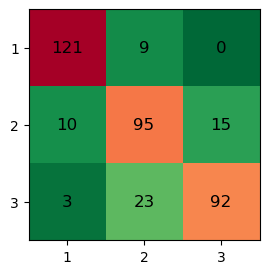

In [42]:
heatmap_corr(pd.DataFrame(confusion_matrix(testY, result_KNN)))

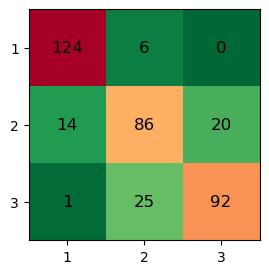

In [43]:
heatmap_corr(pd.DataFrame(confusion_matrix(testY, result_SVC)))

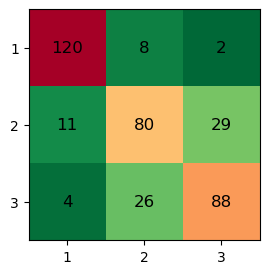

In [44]:
heatmap_corr(pd.DataFrame(confusion_matrix(testY, result_C45)))

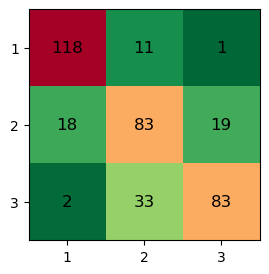

In [45]:
heatmap_corr(pd.DataFrame(confusion_matrix(testY, result_GNB)))

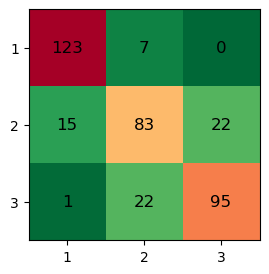

In [46]:
heatmap_corr(pd.DataFrame(confusion_matrix(testY, result_LR)))